In [52]:
import pickle as pickel
import numpy as np
import matplotlib.pyplot as plt

In [53]:
base_path = './ckpts/ckpts-through-time'
parameter_paths = ['pretrain_chess.pt', 'finetune_chess.pt', 'pretrain_english.pt'] # + ['finetune_commentary.pt']

In [72]:
with open(f'anal_pretrain_chess.pt.anal', 'rb') as f:
    analytics_pretrain_chess = pickel.load(f)

with open(f'anal_finetune_chess.pt.anal', 'rb') as f:
    analytics_finetune_chess = pickel.load(f)

with open(f'anal_pretrain_english.pt.anal', 'rb') as f:
    analytics_pretrain_english = pickel.load(f)

### Plot MPS Progressions through the game

In [58]:
def plot_MPS_progression(analytics, title=""):
    x_axis = ['Early', 'Mid', 'Late', 'Full']
    MPS_early_mean = np.nanmean(analytics['MPS_early'])
    MPS_mid_mean = np.nanmean(analytics['MPS_mid'])
    MPS_late_mean = np.nanmean(analytics['MPS_late'])
    MPS_full_mean = np.nanmean(analytics['MPS_full'])
    plt.bar(np.arange(4), [MPS_early_mean, MPS_mid_mean, MPS_late_mean, MPS_full_mean], tick_label = x_axis)
    plt.xlabel("Game stage")
    plt.ylabel("MPS Score")
    plt.title(title)
    plt.show()

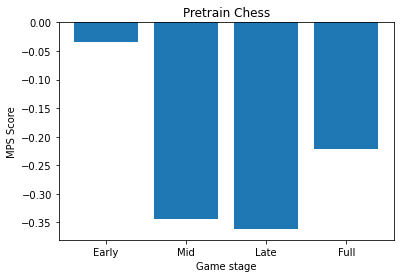

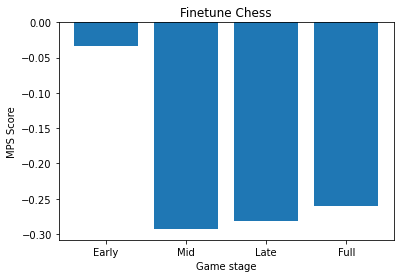

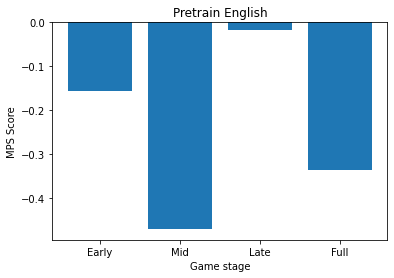

In [60]:
plot_MPS_progression(analytics_pretrain_chess, title="Pretrain Chess")
plot_MPS_progression(analytics_finetune_chess, title="Finetune Chess")
plot_MPS_progression(analytics_pretrain_english, title="Pretrain English")

### Get the Game Length Plots

In [67]:
def plot_game_length(game_lengths):
    x_axis = ['Pretrain Chess', 'Finetune Chess', 'Pretrain English'] #+ ['Finetune Commentary']
    plt.bar(np.arange(len(game_lengths)), game_lengths, tick_label = x_axis)
    plt.xlabel("Training Step")
    plt.ylabel("Average Game Lengths")
    plt.title("Game Lengths (by training step)")
    plt.show()

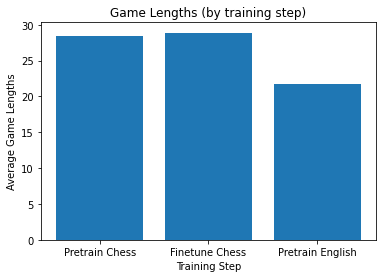

In [68]:
plot_game_length([analytics_pretrain_chess['avg_game_length'], analytics_finetune_chess['avg_game_length'], analytics_pretrain_english['avg_game_length']])